In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Describe the Dataset and its goals

The dataset contains data on female patients at least 21 years old of Pima Indian heritage.

We have 768 patients and the following 8 features:

* Number of times pregnant (pregnant)
* Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plasma)
* Diastolic blood pressure in mm Hg (bp)
* Triceps skin fold thickness in mm (skinfold)
* 2-Hour serum insulin in mu U/ml (insulin)
* Body mass index measured as weight in kg/(height in m)^2 (bmi)
* Diabetes pedigree function (pedigree)
* Age in years (age)

In [2]:
names = ['pregnant', 'plasma', 'bp', 'skinfold', 'insulin', 'bmi', 'pedigree','age','class']
data = pd.read_csv('pima-indians-diabetes.data.txt', sep=',', names=names)

In [3]:
data.describe()

,pregnant,plasma,bp,skinfold,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


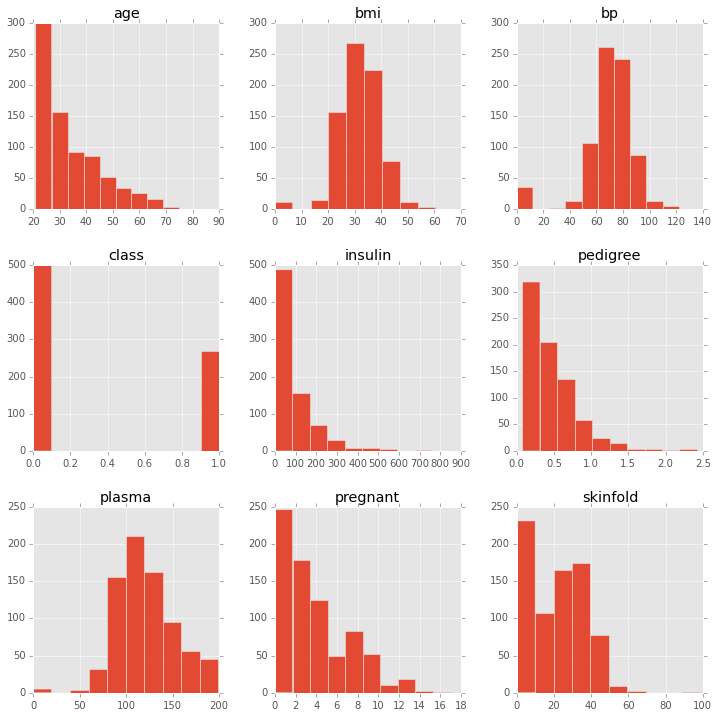

In [4]:
%matplotlib inline
plt.style.use('ggplot')
data.hist(figsize=(12, 12));

## Observations from Data

* Patients are relatively young
* Some high pregnancy counts
* Some 0s that might mean bad data (plasma, bmi, bp)

# Describe the features and formulate a hypothesis on which might be relevant in predicting diabetes

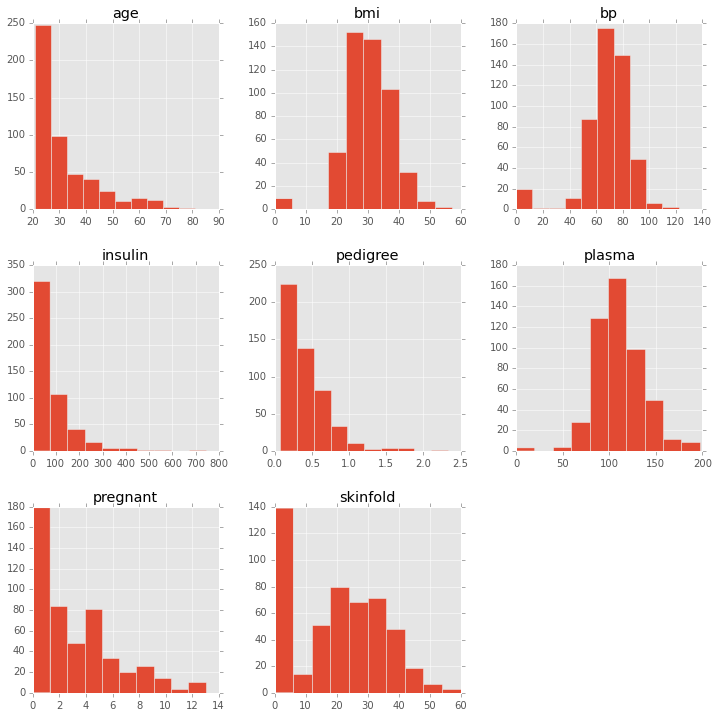

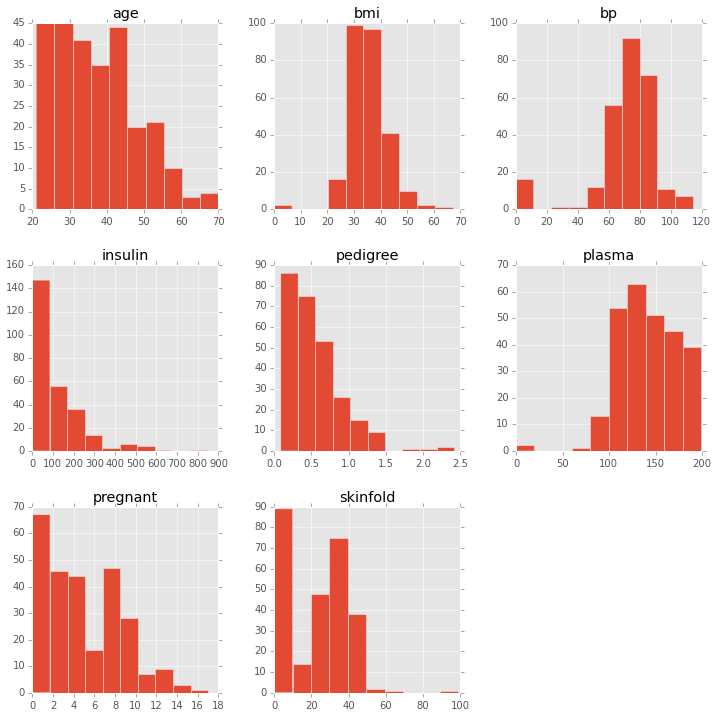

In [5]:
data.groupby('class').hist(figsize=(12, 12));

Feature description above. 

Looking at the bottom set of histograms (class=1), it looks like BMI, BP, and Plasma might be the most relevant features.

# Describe the missing/NULL values. Decide if you should impute or drop them and justify your choice.

In [6]:
data.describe()

,pregnant,plasma,bp,skinfold,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Based on number distribution above, it looks like any 0s for bp, skinfold, plasma, and bmi are missing data. If we replace that, then we get the table below.

In [7]:
data_na = data.replace({'plasma':{0:np.nan},'bp':{0:np.nan},'skinfold':{0:np.nan},'bmi':{0:np.nan}})
data_na.describe()

,pregnant,plasma,bp,skinfold,insulin,bmi,pedigree,age,class
count,768.000000,763.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,115.244002,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It looks like we are missing a lot of skinfold measurements but only a few of the others and high percentage of 0s in both class 0 and 1. Because of this, we won't consider skinfold as a feature and will just drop it. 

In [8]:
data_na.drop('skinfold', axis=1, inplace=True)

In [9]:
data_na.describe()

,pregnant,plasma,bp,insulin,bmi,pedigree,age,class
count,768.000000,763.000000,733.000000,768.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,115.244002,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Come up with a benchmark for the minimum performance that an algorithm should have on this dataset

268 out of the 768 have diabetes. This would mean that you would have a 35% chance of randomly guessing correctly, so obviously we would want our algorithm to perform better.

# What's the best performance you can get with kNN? Is kNN a good choice for this dataset?

In [10]:
data_na = data_na.dropna()
y = data_na['class']
X = data_na.drop('class', axis=1)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

pima_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train) 
y_pred = pima_knn.predict(X_test) 
y_train_pred = pima_knn.predict(X_train) 

print metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) 

             precision    recall  f1-score   support

No Diabetes       0.80      0.77      0.78       122
   Diabetes       0.56      0.59      0.57        59

avg / total       0.72      0.71      0.72       181



With 3 Neighbors, kNN gives us an f1 score of 76 on our test data (68 for actual diabetes diagnosis). 

# What's the best performance you can get with Naive Bayes? Is NB a good choice for this dataset?

In [12]:
from sklearn.grid_search import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import ShuffleSplit

cv = ShuffleSplit(X_train.shape[0], n_iter=10, test_size=0.2, random_state=0)
parameters = {'alpha': np.linspace(1e-4, 1, 10)}
nbayes = MultinomialNB()
clf = GridSearchCV(nbayes, parameters, cv=cv)
clf.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(543, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': array([  1.00000e-04,   1.11200e-01,   2.22300e-01,   3.33400e-01,
         4.44500e-01,   5.55600e-01,   6.66700e-01,   7.77800e-01,
         8.88900e-01,   1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [13]:
clf.best_params_

{'alpha': 0.0001}

In [14]:
clf.best_score_

0.56238532110091743

/Users/ashish/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


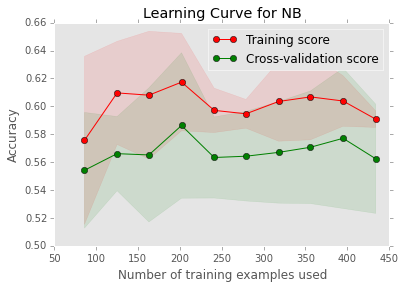

In [15]:
best_nb = clf.best_estimator_
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       train_sizes=np.linspace(.2,1.0,10), n_jobs=1):
    """Create a learning curve to help
    us determine if we are overfitting
    or underfitting.
    
    Parameters
    ----------
    estimator (variable name) : our ML algorithm we want to plot

    title (string) : title for our chart

    X : our training dataframe

    y : our training labels

    ylim (tuple): min, max of the score, ie % accuracy

    cv (variable name) : pass through for our CV strategy
    
    train_sizes (list-like) : the increments of % of our training data to use
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    
    plt.xlabel("Number of training examples used")
    plt.ylabel("Accuracy")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
plot_learning_curve(best_nb, 'Learning Curve for NB', X_train, y_train, cv=cv);

In [16]:
y_pred = best_nb.predict(X_test) 
print metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) 

             precision    recall  f1-score   support

No Diabetes       0.75      0.75      0.75       122
   Diabetes       0.48      0.47      0.48        59

avg / total       0.66      0.66      0.66       181



NB only gives us a best score of 57 with only a 42% score on Diabetes detection. NB is not a good choice for this dataset. 

# What's the best performance you can get with Logistic Regression? Is LR a good choice for this dataset?

In [17]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
# transform our training features
X_train_std = stdsc.fit_transform(X_train)
# transform the testing features in the same way
X_test_std = stdsc.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(penalty='l2', C=10)
logreg.fit(X_train_std, y_train)
y_pred = logreg.predict(X_test_std)
print metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) 

             precision    recall  f1-score   support

No Diabetes       0.82      0.93      0.87       122
   Diabetes       0.80      0.59      0.68        59

avg / total       0.82      0.82      0.81       181



With Logistic Regression, kNN gives us an f1 score of 74 on our test data (62 for actual diabetes diagnosis).

# What's the best performance you can get with Random Forest? Is RF a good choice for this dataset?

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

model = RandomForestClassifier(n_estimators = 20)
model.fit(X, y)

scores = cross_val_score(model, X, y, scoring='accuracy')
print('CV accuracy {}, Average accuracy {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='accuracy')
    print('Estimators {}, CV accuracy {}, Average accuracy {}'.format(n_trees, scores, scores.mean()))

CV accuracy [ 0.7231405   0.75103734  0.81327801], Average accuracy 0.762485282855
Estimators 1, CV accuracy [ 0.68595041  0.65560166  0.6473029 ], Average accuracy 0.662951659179
Estimators 11, CV accuracy [ 0.70247934  0.73858921  0.78838174], Average accuracy 0.743150097733
Estimators 21, CV accuracy [ 0.73553719  0.7593361   0.80082988], Average accuracy 0.765234388395
Estimators 31, CV accuracy [ 0.73553719  0.74688797  0.78423237], Average accuracy 0.755552507344
Estimators 41, CV accuracy [ 0.76446281  0.74688797  0.7966805 ], Average accuracy 0.769343758216
Estimators 51, CV accuracy [ 0.72727273  0.76763485  0.78423237], Average accuracy 0.75971331573
Estimators 61, CV accuracy [ 0.73553719  0.76348548  0.79253112], Average accuracy 0.763851262531
Estimators 71, CV accuracy [ 0.73966942  0.77593361  0.78008299], Average accuracy 0.765228672999
Estimators 81, CV accuracy [ 0.73553719  0.75518672  0.7966805 ], Average accuracy 0.762468136667
Estimators 91, CV accuracy [ 0.735537

In [20]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(X,y)
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head()

,Features,Importance Score
1,plasma,0.275486
4,bmi,0.174370
5,pedigree,0.142504
6,age,0.141304
2,bp,0.096057


model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print metrics.classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']) 

Random Forest gives us an f1 score of 78 on our test data (69 for actual diabetes diagnosis).

# If you could only choose one, which classifer from the above that you already ran is best? How do you define best? (hint: could be prediction accuracy, running time, interpretability, etc)

kNN and Random Forest give us the best F1 scores in prediction. Let's check for any running time differences:

In [21]:
%%timeit
pima_knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train) 
y_pred = pima_knn.predict(X_test) 
y_train_pred = pima_knn.predict(X_train)

100 loops, best of 3: 3.4 ms per loop


In [22]:
%%timeit
model = RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

10 loops, best of 3: 79.3 ms per loop


I would use kNN for the best combination of performance and f1 score.